<div class="alert alert-block alert-danger">
    
### Notes

</div>

### Decision Trees, Random Forests, Numerical python, $ \ldots $.

#### Classification trees:

##### Impurity measures:
 - Information Gain
 - Gini Index
 - $\chi^2$
 - $\ldots$
 
***
Let $X$ be a random variable.

Shannon's entropy $\mathcal{H}(X) := \mathbb{E}[I(X)] = \mathbb{E}[-log_2 (P(X))] = - \sum_{\forall x \in X} p(x) log_2 p(x)$

***

Let $\mathbf{D}$ be of size $n \times p$

Let $\{C_k\}_{k=1}^m$  be the set of classifications.

Shannon's entropy $\mathcal{H}(\{C_k\}_{\forall k}) = -\sum_{\forall k} P(C_k) \log_2 P(C_k)$


For each predictor $i \in [1, p]$:

 - Let $\Omega_i$ be the sample space.


 - $\mathcal{H}_{\Omega_i} = \sum_{\forall t \in \Omega_i} p(t) \sum_{\forall (C_k \mid t)} (-p(C_k \mid t) log_2 p(C_k \mid t))$


 - $\text{InformationGain}(C, i) := \mathcal{H}(\{C_k\}_{\forall k}) - \mathcal{H}(\Omega_i)$

Split at predictor $i$ with maximum $\text{InformationGain}(C, i)$, $\forall_i$


***

#### Regression trees:

- ##### Reduction of variance using unbiased estimator $s^2$ for $\sigma^2$

***

#### Random Forests:

- ##### Bagging (Bootstrap Aggregation) and subspace sampling.

***

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
plt.close('all')
np.random.seed(1234)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

***

In [5]:
data = pd.read_csv('pima-indians-diabetes-database.csv')
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
train_set, test_set = train_test_split(data, test_size=0.2)
print('Size of random train set: {}'.format(len(train_set)))
print('Size of random test set: {}'.format(len(test_set)))

Size of random train set: 614
Size of random test set: 154


In [9]:
train_set['Outcome'].value_counts()

0    401
1    213
Name: Outcome, dtype: int64

In [10]:
test_set['Outcome'].value_counts()

0    99
1    55
Name: Outcome, dtype: int64

In [11]:
X_train, Y_train = train_set.iloc[:,0:8], train_set.iloc[:,8]
X_test, Y_test = test_set.iloc[:,0:8], test_set.iloc[:,8]

***

In [12]:
tree_gini = DecisionTreeClassifier().fit(X_train, Y_train)
tree_gini_predictions = tree_gini.predict(X_train)
print(confusion_matrix(Y_train, tree_gini_predictions))

[[401   0]
 [  0 213]]


In [13]:
labels = list(map(str, Y_train))

export_graphviz(
                tree_gini,
                out_file="diabetes_decision_tree.dot",
                feature_names=X_train.columns,
                class_names=labels,
                rounded=True,
                filled=True
)

In [14]:
print(X_train.columns, tree_gini.feature_importances_, sep='\n\n')

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

[0.06187514 0.32437721 0.06033859 0.07872537 0.05749064 0.16878958
 0.1384194  0.10998406]


In [15]:
tree_gini_predictions = tree_gini.predict(X_test)
print(confusion_matrix(Y_test, tree_gini_predictions))

[[72 27]
 [25 30]]


***

In [16]:
tree_entropy = DecisionTreeClassifier(criterion='entropy').fit(X_train, Y_train)
tree_entropy_predictions = tree_entropy.predict(X_train)
print(confusion_matrix(Y_train, tree_entropy_predictions))

[[401   0]
 [  0 213]]


In [17]:
export_graphviz(
                tree_entropy,
                out_file="diabetes_entropy_tree.dot",
                feature_names=X_train.columns,
                class_names=labels,
                rounded=True,
                filled=True
)

In [18]:
print(X_train.columns, tree_entropy.feature_importances_, sep='\n\n')

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

[0.09568968 0.29012917 0.0580803  0.03120682 0.05304177 0.1717931
 0.11904587 0.1810133 ]


In [19]:
tree_entropy_predictions = tree_entropy.predict(X_test)
print(confusion_matrix(Y_test, tree_entropy_predictions))

[[77 22]
 [20 35]]


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


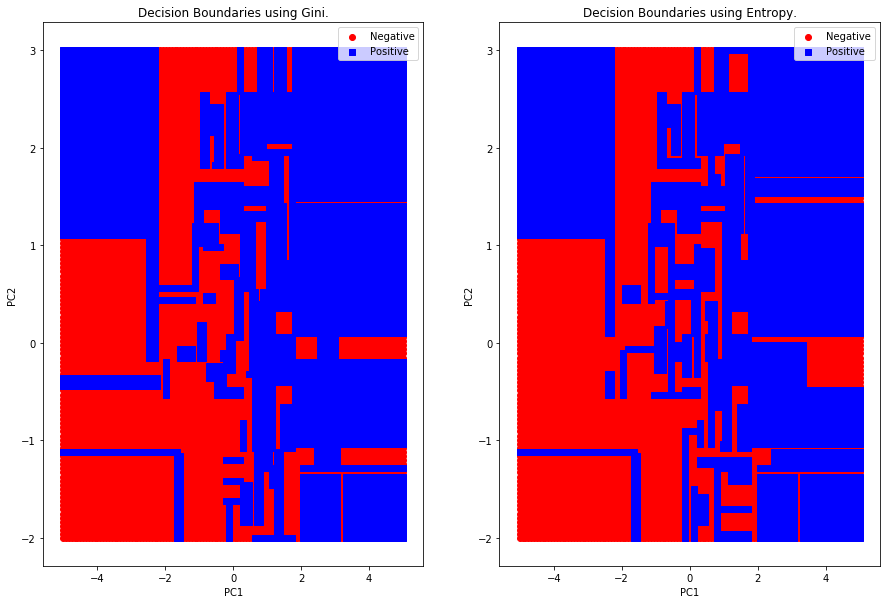

In [20]:
X = StandardScaler().fit_transform(data.iloc[:, 0:-1])
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

def classify_and_plot_decision_boundaries():
    
    gini_plots = { 0 : ([], []), 1 : ([], []) }
    entropy_plots = { 0 : ([], []), 1 : ([], []) }
    markers = { 0 : "o", 1 : "s" }
    colors  = { 0 : "r", 1 : "b" }
    labels = { 0: "Negative", 1: "Positive" }
    
    min_pc1, max_pc1 = int(np.min(pca_components[:, 0])), int(np.max(pca_components[:, 0]))
    min_pc2, max_pc2 = int(np.min(pca_components[:, 1])), int(np.max(pca_components[:, 1]))

    tree_gini = DecisionTreeClassifier().fit(pca_components, data.iloc[:, -1])
    tree_entropy = DecisionTreeClassifier(criterion='entropy').fit(pca_components, data.iloc[:, -1])
    
    for pc1_ in np.linspace(min_pc1, max_pc1, 120):
        for pc2_ in np.linspace(min_pc2, max_pc2, 120):
            gini_predicted_label = tree_gini.predict(np.expand_dims(np.array([pc1_, pc2_]), axis=0))
            entropy_predicted_label = tree_entropy.predict(np.expand_dims(np.array([pc1_, pc2_]), axis=0))
            gini_plots[gini_predicted_label[0]][0].append(pc1_)
            gini_plots[gini_predicted_label[0]][1].append(pc2_)
            entropy_plots[entropy_predicted_label[0]][0].append(pc1_)
            entropy_plots[entropy_predicted_label[0]][1].append(pc2_)

    plt.figure(figsize=(15,10))
    
    plt.subplot(1,2,1)
    for label, (x, y) in gini_plots.items():
        plt.scatter(x, y, color=colors[label], marker=markers[label],
                          label=labels[label], zorder=0)
    plt.legend(loc=0)
    plt.title('Decision Boundaries using Gini.')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    
    plt.subplot(1,2,2)
    for label, (x, y) in entropy_plots.items():
        plt.scatter(x, y, color=colors[label], marker=markers[label],
                          label=labels[label], zorder=0)
    plt.legend(loc=0)
    plt.title('Decision Boundaries using Entropy.')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    
    plt.show()


classify_and_plot_decision_boundaries()       

***
***

In [21]:
forest_entropy = RandomForestClassifier(criterion='entropy').fit(X_train, Y_train)
forest_entropy_predictions = forest_entropy.predict(X_test)
print(confusion_matrix(Y_test, forest_entropy_predictions))

[[90  9]
 [28 27]]


In [22]:
forest_gini = RandomForestClassifier(criterion='gini').fit(X_train, Y_train)
forest_gini_predictions = forest_gini.predict(X_test)
print(confusion_matrix(Y_test, forest_gini_predictions))

[[91  8]
 [31 24]]


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


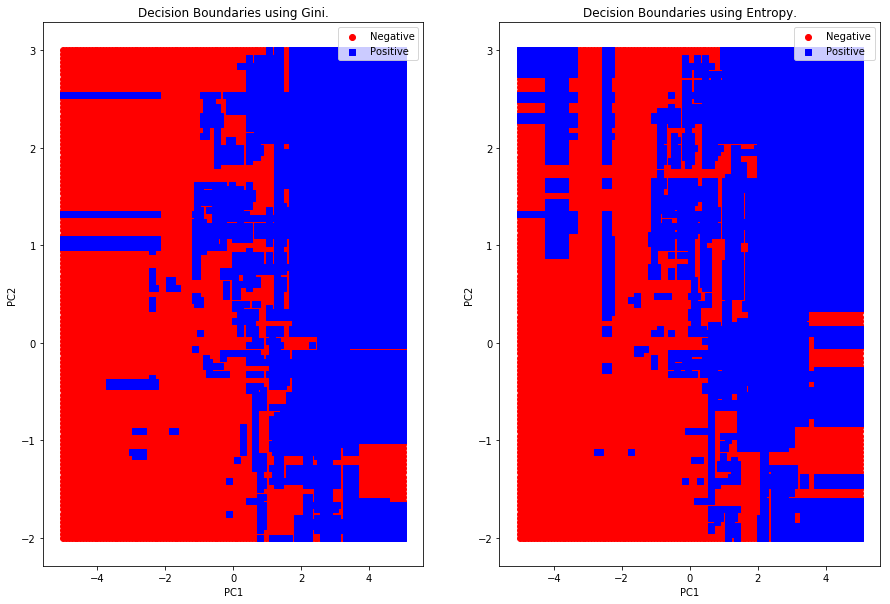

In [23]:
X = StandardScaler().fit_transform(data.iloc[:, 0:-1])
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

def classify_and_plot_decision_boundaries():
    
    gini_plots = { 0 : ([], []), 1 : ([], []) }
    entropy_plots = { 0 : ([], []), 1 : ([], []) }
    markers = { 0 : "o", 1 : "s" }
    colors  = { 0 : "r", 1 : "b" }
    labels = { 0: "Negative", 1: "Positive" }
    
    min_pc1, max_pc1 = int(np.min(pca_components[:, 0])), int(np.max(pca_components[:, 0]))
    min_pc2, max_pc2 = int(np.min(pca_components[:, 1])), int(np.max(pca_components[:, 1]))

    tree_gini = RandomForestClassifier(criterion='gini').fit(pca_components, data.iloc[:, -1])
    tree_entropy = RandomForestClassifier(criterion='entropy').fit(pca_components, data.iloc[:, -1])
    
    for pc1_ in np.linspace(min_pc1, max_pc1, 120):
        for pc2_ in np.linspace(min_pc2, max_pc2, 120):
            gini_predicted_label = tree_gini.predict(np.expand_dims(np.array([pc1_, pc2_]), axis=0))
            entropy_predicted_label = tree_entropy.predict(np.expand_dims(np.array([pc1_, pc2_]), axis=0))
            gini_plots[gini_predicted_label[0]][0].append(pc1_)
            gini_plots[gini_predicted_label[0]][1].append(pc2_)
            entropy_plots[entropy_predicted_label[0]][0].append(pc1_)
            entropy_plots[entropy_predicted_label[0]][1].append(pc2_)

    plt.figure(figsize=(15,10))
    
    plt.subplot(1,2,1)
    for label, (x, y) in gini_plots.items():
        plt.scatter(x, y, color=colors[label], marker=markers[label],
                          label=labels[label], zorder=0)
    plt.legend(loc=0)
    plt.title('Decision Boundaries using Gini.')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    
    plt.subplot(1,2,2)
    for label, (x, y) in entropy_plots.items():
        plt.scatter(x, y, color=colors[label], marker=markers[label],
                          label=labels[label], zorder=0)
    plt.legend(loc=0)
    plt.title('Decision Boundaries using Entropy.')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    
    plt.show()


classify_and_plot_decision_boundaries()